In [1]:

from __future__ import division, print_function, unicode_literals
import numpy as np
import os

np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_circles
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pandas as pd

In [51]:
# Datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [52]:
# Definición de caracteristicas y clases (Flores)
X = iris["data"] # Caracteristicas
Y = iris["target"] # Clases

In [54]:
# Definición de los nombres de cada clase para cada caracteristica
names_features = iris["feature_names"]
names_target = iris["feature_names"]
df = pd.DataFrame(X, columns=names_features)

In [55]:
# Ordenamiento de los datos
columns_name =[ "".join([c.capitalize() for c in cols.split()])  for cols in df.columns ]
columns_name =[col.replace("(" ,"_") for col in columns_name ]
cols= [col.replace(")" ,"") for col in columns_name ]

In [56]:
df.columns=cols
df["Target"]=Y

In [57]:
# Definición de los indices para los datos de entrenamiento y de test
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["Target"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [8]:
# Variables con los indices
df_test = strat_test_set
df_train = strat_train_set

In [58]:
# Seleccion de valores de y
# Elección solo de una caracteristicas

# Definición de los valores de entrenamiento y test, valores one_hot

# Train
y_train = (df_train['Target'] == 0).astype(float)

X_train = df_train.iloc[:,0:1].values

# Test
y_test = (df_test['Target'] == 0).astype(float)
X_test = df_test.iloc[:,0:1].values

In [59]:
# Definición de metodo de regresión logistica LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Verificación de scores para cada valor
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test,y_test))

0.9166666666666666
0.8


In [62]:
# Determinacion de la frontera
X_new = np.linspace(-10, 10, 10000).reshape(-1, 1) #Generamos los valores de X_new
# Calculo de los valores de las caracteristicas más probables
prob = log_reg.predict_proba(X_new)

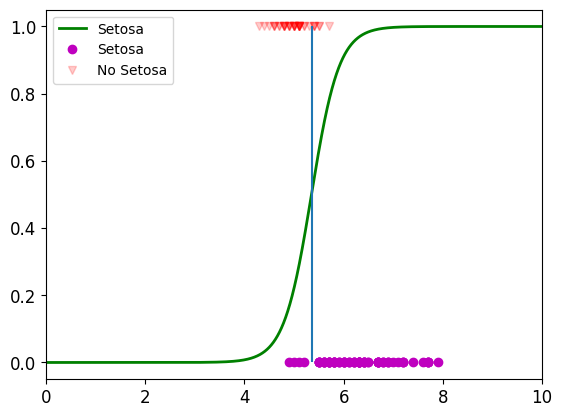

In [63]:
# Definición de la frontera de decisión con corte en la regresión logistica en 0.5
decision_boundary = X_new[prob[:, 0] >= 0.5][0]
plt.figure()
#Regresion Logistica
plt.plot(X_new, prob[:, 0], "g-", linewidth=2, label="Setosa")
# Valores de las caracteristicas para dos clases diferentes 0 o 1. Setosa o no setosa
plt.plot(X_train[y_train==0], y_train[y_train==0],"mo",label = "Setosa")
plt.plot(X_train[y_train==1], y_train[y_train==1],"rv",alpha=0.2,label="No Setosa")
plt.xlim(0.0,10)
plt.legend()
plt.vlines(decision_boundary, 0,1)
plt.show()

Punto 8.1

In [65]:
# Entrenamiento de la regresión logística para cada clase (cada flor)

# Determinación de cada clase
# Son solo 3 clases posibles dependientes de los valores del Target: 0 (setosa),1 (versicolor),2 (Virginica)
# Se definen a través de las divisiones dadas por la regresión logistica donde 0 cuando == 0.5 y 1,2 cuando >0.5
models = []
for i in range(3):
  y_i = (Y == i).astype(int)
  # Regresión logisitica
  log_reg = LogisticRegression()

  log_reg.fit(X, y_i)
  models.append(log_reg)

# X_new representa las características de la flor para la que se quiere calcular la probabilidad para cada caracteristica particular
X_new = np.array([4.9, 5.0, 1.8, 0.3]).reshape(1, -1)

# Calculao de la probabilidad para cada clase
# Cada clase se clasifica dependiendo de la probalilidad que tenga de que alguna de las caracteristicas 'X_new' pertenezca a estas
probabilities = [model.predict_proba(X_new)[0, 1] for model in models]

# Impresión de las probabilidades
print("Probabilidad de Setosa:", probabilities[0])
print("Probabilidad de Versicolor:", probabilities[1])
print("Probabilidad de Virginica:", probabilities[2])

Probabilidad de Setosa: 0.9894141862809369
Probabilidad de Versicolor: 0.006278269060146328
Probabilidad de Virginica: 2.4183652753998774e-06


Punto 8.2

PUNTO 1

In [66]:
# Elección de las caracteristicas de cada clase
X = iris["data"][:, (2, 3)]  # Longitud y ancho del petalo
y = iris["target"] # Tipo de clase para cada caracteristica


In [67]:
# Creación del bias
# Bias en x_0=1
# Vectores con cada caracteristica y x_0
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [68]:
# Validación del conjunto de entrenamiento y de test

# Parametros
np.random.seed(2042)
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

# Longitud del test para cada permutación
test_size = int(total_size * test_ratio)
# Longitud de la validación para cada permutación
validation_size = int(total_size * validation_ratio)
# Longitud de los valores de entranamiento
train_size = total_size - test_size - validation_size
# Permutación de indices
rnd_indices = np.random.permutation(total_size)

# Definición de valores de entranimiento, test  y validación
X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [71]:
# Conversión del vector de las caracteristicas de cada clase (cada flor) en una matriz que contenga un vector 'one_hot' para cada caracteristica
def to_one_hot(y):
  #Tres clases posibles: 0,1,2
    n_classes = y.max() + 1
    m = len(y)
    #Definición del vector 150 x 3
    Y_one_hot = np.zeros((m, n_classes))
    # Adiccion del bias x_0
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [72]:
# Matrices de cada caracteristica
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [74]:
# Aplicación de Softmax function
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [77]:
#Definición del numero de salidas e ingresos
n_inputs = X_train.shape[1] # 2 caracteristicas más el bias
n_outputs = len(np.unique(y_train))   # El total de clases(Tipos de flores)

In [78]:
# Entrenamiento de Sotfmax usando el gradiente Descendente

# Parametros elegidos
eta = 0.01
n_iterations = 5001
m = len(X_train)
# Precisión
epsilon = 1e-7

# Definición de los valores de theta para la función de coste
Theta = np.random.randn(n_inputs, n_outputs)
# Función de coste y gradiente descendente
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    # Función de coste con vector one hot y Y dada por softmax
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    # Error relativo
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
      #Gradiente descendente
    gradients = 1/m * X_train.T.dot(error)
    # Reinicio del calculo
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


In [79]:
# Predicciones para validar el conjunto de caractersiticas elegido y verificación del score
# Se verifica si la caracteristica probalistica dada por softmax es satisfactoria comparandola con una caracterisitca real
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

PUNTO 2

In [80]:
# Regularización

# Se prueba si la caracteristica probalistica sigue siendo satisfactoria despues de simular una cantidad alta de repeticiones a través de iteraciones

# Se eligen los parametros
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7 # Precisión
alpha = 0.1  # Hiperparametro de regularización

Theta = np.random.randn(n_inputs, n_outputs)

# Iteraciones
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    # Caracteristica probalistica
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    # Calculo de las perdidas despues de cada iteración
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    # Error
    error = Y_proba - Y_train_one_hot
    # Reinicio del calculo
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.4946891059460322
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [81]:
# Verificación del score de la verificación con iteraciones
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

PUNTO 3

In [82]:
# Mejoramieno del modelo cambiando la métrica
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty # Definición del mejor parametro de perdida

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
  # Función de coste y gradiente con los valores de las caracteristicas one_hot de entrenamiento
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
  # Función de coste y gradiente con los valores de las caracteristicas one_hot reales
    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    # Verificación de la satisifacción de las perdidas en comparación con el mejor parametro de perdida
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109128
1500 0.5355752782580261
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 early stopping!


In [83]:
# Verificación del score
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

PUNTO 4

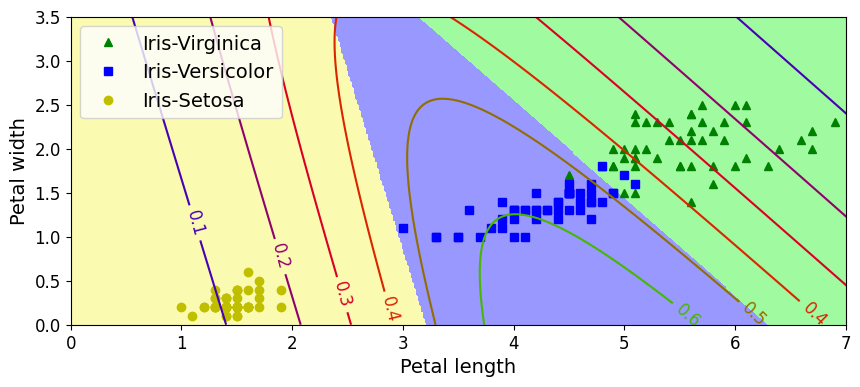

In [84]:
# Fronteras de decisión para el multiclasificador

# Vectorización de las caracteristicas x0 y x1
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
# Caracteristicas vectorizadas
X_new = np.c_[x0.ravel(), x1.ravel()]
# Creación del bias
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

# Calculo de la caracteristica probalistica con sotfmax
logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

# Vectorización de la caracteristica
zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# Graficación

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [85]:
# Verificación del score
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333